In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from trendmaster import trend
import itertools
import datetime
import pickle
import descartes
import geopandas as gpd
from shapely.geometry import Point,Polygon

In [2]:
def saveDict(dictionary,filename):
    """
    Saves dictionary to pickle file in working directory.
    
    Parameters
    ----------
    dictionary: dict
    filename: str
        filename without .pkl ending
    
    Returns
    -------
    Nothing
    """
    f = open(f"{filename}.pkl","wb")
    pickle.dump(dictionary,f)
    f.close()

def openDict(filename):
    """
    Opens dictionary from pickle file in working directory.
    
    Parameters
    ----------
    filename: str
        filename without .pkl ending
    
    Returns
    -------
    dictionary
    """
    pickle_in = open(f"{filename}.pkl","rb")
    loadedDict = pickle.load(pickle_in)
    return loadedDict

In [7]:
sor = openDict("sorlandet_final")
ost = openDict("ostlandet_final")
vest = openDict("vestlandet_final")
trond = openDict("trondelag_final")
nord = openDict("nordland_final")
finn = openDict("finnmark_final")

In [3]:
norge = gpd.read_file("gis/Norge.shp")
regionLines = gpd.read_file("gis/Grense_Avrenningsregioner.shp")
stations = gpd.read_file("gis/Gauging_Stations.shp")

In [12]:
meta = sor["metadata"]

regine = list(meta.regine)
main = list(meta.main)
final = []
for i in range(len(regine)):
    final.append(f"{str(regine[i])}.{str(main[i])}")

mask = stations.STASJON_NR.isin(final)
finalStations = stations[mask]

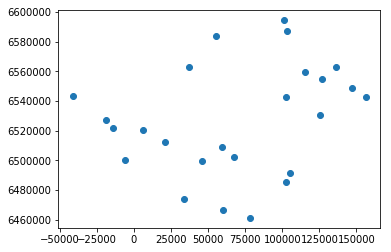

In [15]:
finalStations.plot()

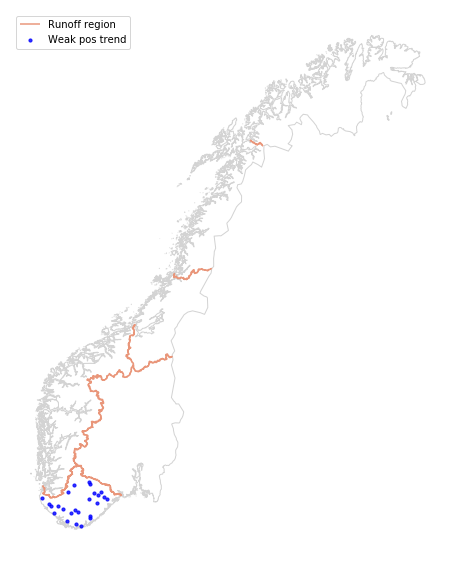

In [16]:
fig,ax = plt.subplots(figsize=(30,10))
norge.plot(ax=ax,color="white", edgecolor="lightgrey")
regionLines.plot(ax=ax,color="darksalmon",label="Runoff region")
finalStations.plot(ax=ax,marker=".",markersize=40,color="b",label="Weak pos trend",alpha=.8)
#stations50.plot(ax=ax,marker="o",markersize=40,color="b",label="Strong pos trend",alpha=.8)
plt.setp(ax.get_xticklabels(), visible=False)
plt.setp(ax.get_yticklabels(), visible=False)
plt.setp(ax.get_xticklines(), visible=False)
plt.setp(ax.get_yticklines(), visible=False)
plt.setp(ax.spines.values(), visible=False)
plt.legend(loc="upper left")
#plt.savefig("Plots/final&removed_map.png",dpi=400,bbox_inches='tight')